### 데이터 불러오기

In [ ]:
# prompt: 구글 드라이브 연결

from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Korpora

In [ ]:
# NSMC 데이터 불러오기
from Korpora import Korpora

Korpora.fetch("nsmc")

[nsmc] download ratings_train.txt: 14.6MB [00:00, 60.5MB/s]                            
[nsmc] download ratings_test.txt: 4.90MB [00:00, 27.9MB/s]                           


In [6]:
corpus = Korpora.load("nsmc")


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `nsmc` is already installed at /root/Korpora/nsmc/ratings_train.txt
[Korpora] Corpus `nsmc` is already installed at /root/Korpora/nsmc/ra

In [ ]:
import pandas as pd

data1_text = pd.DataFrame(corpus.train.texts, columns=["text"])
data1_labels = pd.DataFrame(corpus.train.labels, columns=["labels"])
data1 = pd.concat([data1_text, data1_labels], axis=1)

In [ ]:
data2_text = pd.DataFrame(corpus.test.texts, columns=["text"])
data2_labels = pd.DataFrame(corpus.test.labels, columns=["labels"])
data2 = pd.concat([data2_text, data2_labels], axis=1)

In [ ]:
data3 = pd.read_excel(
    "/content/drive/MyDrive/Colab Notebooks/특정 테스크에 해당하는 자연어처리 모델 서빙하기/데이터/한국어_단발성_대화_데이터셋.xlsx"
)
data4 = pd.read_excel(
    "/content/drive/MyDrive/Colab Notebooks/특정 테스크에 해당하는 자연어처리 모델 서빙하기/데이터/한국어_연속적_대화_데이터셋.xlsx"
)
data5 = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/특정 테스크에 해당하는 자연어처리 모델 서빙하기/데이터/new_data.csv"
)

In [ ]:
data3 = data3.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "공포", 5468], axis=1)
data3 = data3.rename(columns={"Sentence": "text", "Emotion": "labels"})
data4 = data4.drop(
    [
        "Unnamed: 0",
        "Unnamed: 3",
        "Unnamed: 4",
        "공포",
        "행복",
        "중립",
        "슬픔",
        "혐오",
        "분노",
        "놀람",
    ],
    axis=1,
)
data4 = data4.rename(columns={"Unnamed: 1": "text", "Unnamed: 2": "labels"})
data4 = data4.drop(0)

In [13]:
len(data1), len(data2), len(data3), len(data4), len(data5)

(150000, 50000, 38594, 55629, 58271)

In [ ]:
# Assuming 'label' is the name of your column
data1["labels"] = data1["labels"].replace({0: "부정", 1: "긍정"})
data2["labels"] = data2["labels"].replace({0: "부정", 1: "긍정"})
data1.iloc[1, 1] = "긍정"
# Keep only rows where the label is one of the specified emotions
data3 = data3[data3["labels"].isin(["분노", "혐오", "행복", "중립"])]
data4 = data4[data4["labels"].isin(["분노", "혐오", "행복", "중립"])]
# Replace 'anger' and 'disgust' with 'negativity', and 'happiness' with 'positivity'
data3["labels"] = data3["labels"].replace(
    {"분노": "부정", "혐오": "부정", "행복": "긍정"}
)
data4["labels"] = data4["labels"].replace(
    {"분노": "부정", "혐오": "부정", "행복": "긍정"}
)

<ipython-input-15-e9ea91620204>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['labels'] = data3['labels'].replace({'분노': '부정', '혐오': '부정', '행복': '긍정'})
<ipython-input-15-e9ea91620204>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['labels'] = data4['labels'].replace({'분노': '부정', '혐오': '부정', '행복': '긍정'})


In [ ]:
import numpy as np

# 공백 문자열을 NaN으로 변환
data1.replace("", np.nan, inplace=True)
data2.replace("", np.nan, inplace=True)
data3.replace("", np.nan, inplace=True)
data4.replace("", np.nan, inplace=True)
data5.replace("", np.nan, inplace=True)

In [17]:
# 데이터셋의 결측치 확인
print(data1.isnull().sum())
print(data2.isnull().sum())
print(data3.isnull().sum())
print(data4.isnull().sum())
print(data5.isnull().sum())

text      5
labels    0
dtype: int64
text      3
labels    0
dtype: int64
text      0
labels    0
dtype: int64
text      0
labels    0
dtype: int64
labels    0
text      0
dtype: int64


In [18]:
# 결측치가 포함된 모든 행 제거
data1 = data1.dropna()
data2 = data2.dropna()

In [ ]:
# 한국어 외 문자가 포함된 행 찾기 및 '.', ',', '!', '?'로만 이루어진 문자열 제외
non_korean1 = data1[
    ~data1["text"].str.contains("[가-힣ㄱ-ㅎㅏ-ㅣ]")
    & ~data1["text"].str.match("^[.,!?^;]+$")
]
non_korean2 = data2[
    ~data2["text"].str.contains("[가-힣ㄱ-ㅎㅏ-ㅣ]")
    & ~data2["text"].str.match("^[.,!?^;]+$")
]
non_korean3 = data3[
    ~data3["text"].str.contains("[가-힣ㄱ-ㅎㅏ-ㅣ]")
    & ~data3["text"].str.match("^[.,!?^;]+$")
]
non_korean4 = data4[
    ~data4["text"].str.contains("[가-힣ㄱ-ㅎㅏ-ㅣ]")
    & ~data4["text"].str.match("^[.,!?^;]+$")
]
non_korean5 = data5[
    ~data5["text"].str.contains("[가-힣ㄱ-ㅎㅏ-ㅣ]")
    & ~data5["text"].str.match("^[.,!?^;]+$")
]

In [22]:
len(non_korean1), len(non_korean2), len(non_korean3), len(non_korean4), len(non_korean5)

(1034, 366, 1, 5, 0)

In [23]:
# non_korean에서 찾은 행을 원본 데이터셋에서 제거
data1 = data1.drop(non_korean1.index)
data2 = data2.drop(non_korean2.index)
data3 = data3.drop(non_korean3.index)
data4 = data4.drop(non_korean4.index)

In [24]:
len(data1), len(data2), len(data3), len(data4), len(data5)

(148961, 49631, 21960, 48659, 58271)

In [ ]:
print(data1["labels"].value_counts())
print(data2["labels"].value_counts())
print(data3["labels"].value_counts())
print(data4["labels"].value_counts())
print(data5["labels"].value_counts())

부정    74743
긍정    74218
Name: labels, dtype: int64
긍정    24955
부정    24676
Name: labels, dtype: int64
부정    11094
긍정     6036
중립     4830
Name: labels, dtype: int64
중립    43781
부정     3848
긍정     1030
Name: labels, dtype: int64
부정    50932
긍정     7339
Name: labels, dtype: int64


In [30]:
# 첫번째 시도
data = pd.concat([data1, data2, data3, data4])

In [ ]:
print(data["labels"].value_counts())

In [ ]:
print(data.isnull().sum())

In [ ]:
# 데이터 저장
# data.to_csv('/content/drive/MyDrive/Colab Notebooks/특정 테스크에 해당하는 자연어처리 모델 서빙하기/data.csv', index=False, encoding='utf-8-sig')

In [ ]:
# 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


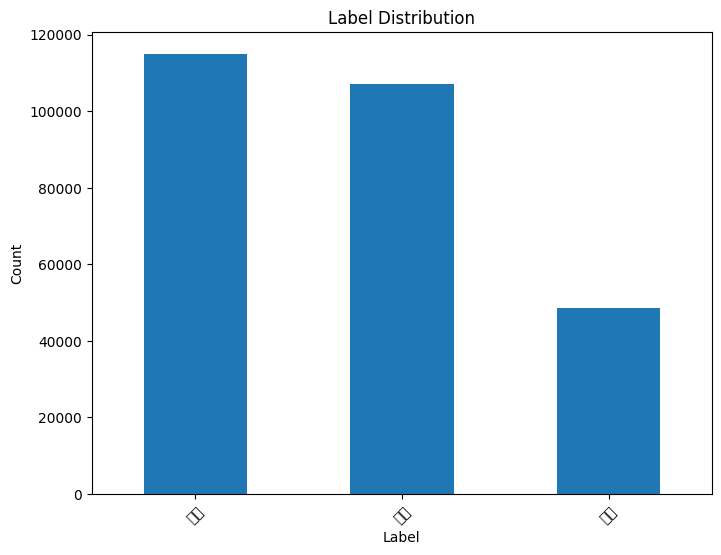

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 레이블 분포 계산
label_counts = data["labels"].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
label_counts.plot(kind="bar")
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 한글 폰트 설정
plt.rc("font", family="NanumBarunGothic")

## 첫번째 시도
- NSMC 데이터 + AI HUB 한국어 감정 데이터 세트

### 랜덤 언더 샘플링

In [ ]:
!pip install imbalanced-learn

### NSMC 데이터에서만 삭제

In [ ]:
movie = pd.concat([data1, data2])

In [ ]:
print(movie["labels"].value_counts())

부정    99419
긍정    99173
Name: labels, dtype: int64


In [ ]:
hub_data = pd.concat([data3, data4])

In [ ]:
print(hub_data["labels"].value_counts())

중립    48611
부정    14942
긍정     7066
Name: labels, dtype: int64


In [ ]:
positive = (hub_data["labels"].value_counts()["중립"]) - (
    hub_data["labels"].value_counts()["긍정"]
)
negative = (hub_data["labels"].value_counts()["중립"]) - (
    hub_data["labels"].value_counts()["부정"]
)

In [ ]:
positive, negative

(41545, 33669)

In [ ]:
# NSMC 데이터에서 긍정과 부정 레이블을 hub 데이터의 긍정과 부정 레이블 개수에 맞춰 언더 샘플링
movie_positive = movie[movie["labels"] == "긍정"].sample(n=positive, random_state=42)
movie_negative = movie[movie["labels"] == "부정"].sample(n=negative, random_state=42)

In [ ]:
mrus_data = pd.concat([hub_data, movie_positive, movie_negative])
print(mrus_data["labels"].value_counts())

부정    48611
중립    48611
긍정    48611
Name: labels, dtype: int64


In [ ]:
# 인덱스 다시 정렬
mrus_data = mrus_data.reset_index(drop=True)

In [ ]:
mrus_data.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/특정 테스크에 해당하는 자연어처리 모델 서빙하기/mrus_data.csv",
    index=False,
    encoding="utf-8-sig",
)

### 전체 랜덤 언더 샘플링

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# 랜덤 언더 샘플링 객체 생성
rus = RandomUnderSampler(random_state=42)

# 데이터와 레이블 분리
X = data[["text"]]  # 데이터프레임을 2차원 구조로 유지
y = data["labels"]

# 언더 샘플링 적용
X_resampled, y_resampled = rus.fit_resample(X, y)

# 결과를 데이터 프레임으로 변환
data_resampled = pd.DataFrame(X_resampled, columns=["text"])
data_resampled["labels"] = y_resampled

# 결과 확인
print(data_resampled["labels"].value_counts())

긍정    48611
부정    48611
중립    48611
Name: labels, dtype: int64


In [ ]:
data_resampled.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/특정 테스크에 해당하는 자연어처리 모델 서빙하기/data_resampled.csv",
    index=False,
    encoding="utf-8-sig",
)

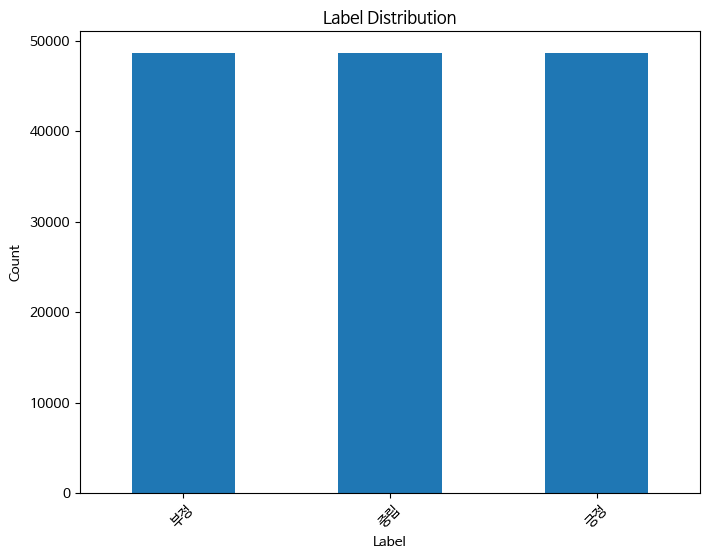

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 레이블 분포 계산
label_counts = mrus_data["label"].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
label_counts.plot(kind="bar")
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 한글 폰트 설정
plt.rc("font", family="NanumBarunGothic")

### 두번째 시도
- 감성 대화 말뭉치 추가 & NSMC 제거

In [39]:
data = pd.concat([data3, data4, data5])

In [ ]:
print(data["labels"].value_counts())

부정    65874
중립    48611
긍정    14405
Name: labels, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# 랜덤 언더 샘플링 객체 생성
rus = RandomUnderSampler(random_state=42)

# 데이터와 레이블 분리
X = data[["text"]]  # 데이터프레임을 2차원 구조로 유지
y = data["labels"]

# 언더 샘플링 적용
X_resampled, y_resampled = rus.fit_resample(X, y)

# 결과를 데이터 프레임으로 변환
data_resampled = pd.DataFrame(X_resampled, columns=["text"])
data_resampled["labels"] = y_resampled

# 결과 확인
print(data_resampled["labels"].value_counts())

긍정    14405
부정    14405
중립    14405
Name: labels, dtype: int64


In [ ]:
data_resampled.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/특정 테스크에 해당하는 자연어처리 모델 서빙하기/데이터/hub_rus_data.csv",
    index=False,
    encoding="utf-8-sig",
)

In [ ]:
data.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/특정 테스크에 해당하는 자연어처리 모델 서빙하기/데이터/hub_data.csv",
    index=False,
    encoding="utf-8-sig",
)